In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Setting display options

In [174]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)
np.set_printoptions(threshold=np.inf)

#### Task 1: Data Understanding

In [175]:
df_movie = pd.read_csv("/Users/neha.p/Desktop/Unmessenger_Internship/Assignment_4/Assessment 4/Dataset.csv")
df_movie.sample(10)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
49994,tt1620907,Na Ghar Ke Na Ghaat Ke,2010,-,6.1,269,"Comedy, Drama",bhojpuri
13038,tt0238188,Don Ghadicha Daav,1958,-,-,-,-,marathi
16214,tt10626906,Shesher Golpo,2019,122 min,4.1,13,"Drama, Romance",bengali
24356,tt12757130,Bager Baccha,2001,142 min,-,-,"Action, Comedy, Drama",bengali
46832,tt14127388,Zabata,1993,155 min,-,-,Action,punjabi
50130,tt0269889,Sorathno Savaj,1985,-,-,-,"Drama, Romance",gujarati
48408,tt8733898,U Turn,2018,128 min,7.0,"2,773","Crime, Horror, Mystery",tamil
17270,tt2387419,Chanti,2004,-,3.2,58,Family,telugu
3661,tt0242853,Sardar,1967,-,7.3,10,"Action, History",hindi
21791,tt10976582,Last Chance (Gujarati),2017,-,-,-,Comedy,gujarati


There are some missing values marked as "-". We'll need to convert those to NaN
It also seems like the Gengre column has multiple values.

In [176]:
#replacing the null i.e. "-" values to NaN
df_movie = df_movie.apply(lambda x: x.str.strip()).replace('-', np.nan)

In [177]:
#verifying if '-' have been properly changed to NaN

df_movie.sample(10)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
16495,tt0325215,Daag,I 2001,140 min,7.8,6,NaN,nepali
28719,tt4471488,Mythri,2015,137 min,7.4,300,Drama,malayalam
16683,tt1582526,Kotha Bandham,2010,NaN,NaN,NaN,Family,telugu
44246,tt0352915,Theruvu Narthaki,1988,71 min,NaN,NaN,NaN,malayalam
8343,tt9761238,Avathara Vettai,2019,NaN,NaN,NaN,Drama,tamil
1271,tt5954586,Deiva Thirumagal,1967,125 min,NaN,NaN,NaN,tamil
31999,tt7044754,Parineeta,1986,123 min,NaN,NaN,"Drama, Family, Romance",bengali
8091,tt1442481,"#73, Shaanthi Nivaasa",2007,157 min,7.1,185,"Drama, Family, Musical",kannada
6460,tt9048688,Maindhan,1994,125 min,NaN,NaN,Drama,tamil
4270,tt3680720,Mother of Desert,2004 TV Movie,56 min,NaN,NaN,"Action, Drama",urdu


In [178]:
df_movie.shape

(50602, 8)

The dataset has 8 columns and 50602 rows.

In [179]:
df_movie.columns

Index(['ID', 'Movie Name', 'Year', 'Timing(min)', 'Rating(10)', 'Votes', 'Genre', 'Language'], dtype='object')

In [180]:
#let's see the count of null values and the various data types of each column

df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50602 entries, 0 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           48094 non-null  object
 1   Movie Name   50602 non-null  object
 2   Year         49041 non-null  object
 3   Timing(min)  24710 non-null  object
 4   Rating(10)   23676 non-null  object
 5   Votes        23677 non-null  object
 6   Genre        42021 non-null  object
 7   Language     50602 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


The columns "Timing(min), Rating(10) and Votes" seem to have a lot of null values. Also it seems like the data type of Year should be int, Timing should be int, Rating should be float and Votes should be int as well.

In [181]:
df_movie.describe()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
count,48094,50602,49041,24710,23676,23677,42021,50602
unique,46105,42425,579,258,91,2950,717,19
top,tt3040964,Alif Laila,2018,120 min,7.2,6,Drama,hindi
freq,11,172,1934,835,769,836,13529,14350


Seems like the Movie names are mostly unique.
The unique count of ID doesn't match the unique count of movie name and seems to be higher. This means that there are different IDs for the same movie name, we can check later why this is the case.

In [182]:
for column in df_movie.columns:
    print("Count of null values in {0} = {1}".format(column,df_movie[column].isna().sum()))

Count of null values in ID = 2508
Count of null values in Movie Name = 0
Count of null values in Year = 1561
Count of null values in Timing(min) = 25892
Count of null values in Rating(10) = 26926
Count of null values in Votes = 26925
Count of null values in Genre = 8581
Count of null values in Language = 0


Movie name and language seem to have zero null values whereas timing, rating and votes column seems to have a lot of null values.

Let's check the number of duplicate rows in the dataset. We can later remove such rows.

In [183]:
df_movie.duplicated().sum()

np.int64(1)

There is 1 duplicate row in the dataset. Let's check what it is.

In [184]:
df_movie[df_movie.duplicated()]

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
37213,NaN,Mohabbat Tum Se Nafrat Hai,NaN,NaN,NaN,NaN,"Crime, Drama, Family",urdu


In [185]:
df_movie[df_movie["Movie Name"]=="Mohabbat Tum Se Nafrat Hai"]

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
23818,NaN,Mohabbat Tum Se Nafrat Hai,NaN,NaN,NaN,NaN,"Crime, Drama, Family",urdu
37213,NaN,Mohabbat Tum Se Nafrat Hai,NaN,NaN,NaN,NaN,"Crime, Drama, Family",urdu


It's not just that this row is duplicated but it also doesn't have a lot of meaningful data. It has more than half of it's rows as empty.

#### Task 2: Data Cleaning

#### Removing duplicates

In [186]:
df_movie.drop_duplicates(inplace = True)

In [187]:
df_movie.shape

(50601, 8)

1 Duplicate row has been removed

#### Handling missing data

Now let's remove rows with half or more missing columns

In [188]:
df_movie.isna().sum(axis=1).unique()

array([4, 0, 2, 1, 3, 5, 6])

There are some rows with 0 null values whereas there are rows with more upto 6 missing column values. Let's get a count of each distribution and drop the values with half and more missing column values

In [189]:
for missing_count in range(df_movie.shape[1]+1):
    print("Rows with {0} missing rows = {1} \ti.e. {2}%".format(missing_count, df_movie[df_movie.isna().sum(axis=1)==missing_count].shape[0], round(df_movie[df_movie.isna().sum(axis=1)==missing_count].shape[0]*100/df_movie.shape[0],2)))

Rows with 0 missing rows = 16356 	i.e. 32.32%
Rows with 1 missing rows = 6216 	i.e. 12.28%
Rows with 2 missing rows = 7518 	i.e. 14.86%
Rows with 3 missing rows = 12215 	i.e. 24.14%
Rows with 4 missing rows = 7088 	i.e. 14.01%
Rows with 5 missing rows = 1109 	i.e. 2.19%
Rows with 6 missing rows = 99 	i.e. 0.2%
Rows with 7 missing rows = 0 	i.e. 0.0%
Rows with 8 missing rows = 0 	i.e. 0.0%


Let's remove rows with 4 or more missing column values

In [190]:
df_less_sparse = df_movie.dropna(axis=0, thresh=5)

In [191]:
for missing_count in range(df_less_sparse.shape[1]+1):
    print("Rows with {0} missing rows = {1} \ti.e. {2}%".format(missing_count, df_less_sparse[df_less_sparse.isna().sum(axis=1)==missing_count].shape[0], round(df_less_sparse[df_less_sparse.isna().sum(axis=1)==missing_count].shape[0]*100/df_less_sparse.shape[0],2)))

Rows with 0 missing rows = 16356 	i.e. 38.66%
Rows with 1 missing rows = 6216 	i.e. 14.69%
Rows with 2 missing rows = 7518 	i.e. 17.77%
Rows with 3 missing rows = 12215 	i.e. 28.87%
Rows with 4 missing rows = 0 	i.e. 0.0%
Rows with 5 missing rows = 0 	i.e. 0.0%
Rows with 6 missing rows = 0 	i.e. 0.0%
Rows with 7 missing rows = 0 	i.e. 0.0%
Rows with 8 missing rows = 0 	i.e. 0.0%


In [192]:
print("Number of rows deleted: ", df_movie.shape[0]-df_less_sparse.shape[0])
print("% of rows deleted: ", round((df_movie.shape[0]-df_less_sparse.shape[0])*100/df_movie.shape[0],2))

Number of rows deleted:  8296
% of rows deleted:  16.39


In [193]:
df_movie = df_less_sparse.copy(deep=True)

Let's check a final unique count for all columns

In [194]:
df_movie.describe()

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
count,42149,42305,42304,24339,23676,23677,39788,42305
unique,40192,35812,541,257,91,2950,701,19
top,tt3040964,Alif Laila,2018,120 min,7.2,6,Drama,hindi
freq,11,170,1889,808,769,836,12786,12116


#### Handling incorrect data/ correct data types

#### Cleaning year column

In [195]:
df_movie["Year"].unique()

array(['2006', '1987', '1956', '2008', '2019', '2007', '1939', '1992',
       '1997', '2018 Video', '2016', '1986', '2013', '2017 Video', '1988',
       '2012', '2017', '1974', '1991', '2020', '2009', '1978', '1999',
       '1970', '1985', '1981', '2000', '2003', '1967', '1933', '1996',
       '2010', 'II 2017', '1995', '1973', '2015', 'I 2008', '1966',
       '2021', '1994', '1989', '1938', '1969', '1952', 'II 1976', '2018',
       '1977', '1957', 'I 2014', '1990', '2005', '2014', '1950', 'I 2016',
       '1982', '1983', '2019 Video', '1984', '2013 TV Movie', '2004',
       '1959', '2011', '2020–', '1961', 'I 2010', '1971', '1968', '2002',
       '1940', '2002–2003', '2018–', '1976', 'I 2020', '2018 TV Movie',
       '1979', '2001', '2014 TV Short', '1997–2002', '1958', '1947',
       'I 2018', '1953', '1998', '2014–', '1963', '2004–', '1954', '1980',
       '1965', 'I 2019', '1964', '1937', '1943', '1932', '1949', '1951',
       '1960', '1972', '2010–', '2010 Video', 'IV 2014', '1935

The year data seems to have some invalid column values. let's keep only the year value and convert it to int.


In cases of continuous values we can either remove them or keep the first value. for ex: if data is "2017–2019" keep only 2017

In [196]:
def clean_year(x):
    if(type(x)==int):
        return x
    else:
        clean_str = ""
        for c in x:
            # print(c)
            if(c.isnumeric()):
                clean_str += c
            elif(c=="–"):
                clean_str += c
            else:
                pass
        if(clean_str==""):
            return 0
        else:
            return int(clean_str.split("–")[0])


df_movie["Year"] = df_movie["Year"].fillna(0)
df_movie["Year"] = df_movie["Year"].apply(clean_year)


In [197]:
df_movie["Year"].unique()

array([2006, 1987, 1956, 2008, 2019, 2007, 1939, 1992, 1997, 2018, 2016,
       1986, 2013, 2017, 1988, 2012, 1974, 1991, 2020, 2009, 1978, 1999,
       1970, 1985, 1981, 2000, 2003, 1967, 1933, 1996, 2010, 1995, 1973,
       2015, 1966, 2021, 1994, 1989, 1938, 1969, 1952, 1976, 1977, 1957,
       2014, 1990, 2005, 1950, 1982, 1983, 1984, 2004, 1959, 2011, 1961,
       1971, 1968, 2002, 1940, 1979, 2001, 1958, 1947, 1953, 1998, 1963,
       1954, 1980, 1965, 1964, 1937, 1943, 1932, 1949, 1951, 1960, 1972,
       1935, 1962, 1975, 1934,    0, 1941, 1993, 1955, 1948, 1931, 1942,
       1946, 1945, 1936, 1920, 1944, 1919, 1917, 1929, 2022, 1930])

In [198]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42305 entries, 2 to 50601
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           42149 non-null  object
 1   Movie Name   42305 non-null  object
 2   Year         42305 non-null  int64 
 3   Timing(min)  24339 non-null  object
 4   Rating(10)   23676 non-null  object
 5   Votes        23677 non-null  object
 6   Genre        39788 non-null  object
 7   Language     42305 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.9+ MB


Year column has been successfully converted to int.

#### Cleaning Timing column to int

In [199]:
df_movie["Timing(min)"].unique()

array(['134 min', nan, '112 min', '108 min', '175 min', '138 min',
       '90 min', '141 min', '5 min', '156 min', '122 min', '57 min',
       '92 min', '158 min', '170 min', '145 min', '120 min', '12 min',
       '135 min', '113 min', '161 min', '140 min', '127 min', '142 min',
       '132 min', '129 min', '121 min', '133 min', '125 min', '167 min',
       '104 min', '168 min', '30 min', '97 min', '143 min', '149 min',
       '124 min', '118 min', '150 min', '98 min', '144 min', '117 min',
       '22 min', '126 min', '190 min', '166 min', '91 min', '85 min',
       '159 min', '28 min', '87 min', '188 min', '147 min', '66 min',
       '65 min', '154 min', '23 min', '78 min', '115 min', '151 min',
       '49 min', '109 min', '45 min', '157 min', '13 min', '103 min',
       '100 min', '21 min', '131 min', '116 min', '162 min', '26 min',
       '95 min', '146 min', '137 min', '139 min', '123 min', '19 min',
       '181 min', '195 min', '153 min', '164 min', '81 min', '102 min',
       '10

Let's remove the min and convert all values to int.
Also convert all Nan values to 0

In [200]:
df_movie["Timing(min)"] = df_movie["Timing(min)"].apply(lambda x: int("".join(x.split("min")[0].strip().split(","))) if x==x else 0)

In [201]:
df_movie["Timing(min)"].unique()

array([ 134,    0,  112,  108,  175,  138,   90,  141,    5,  156,  122,
         57,   92,  158,  170,  145,  120,   12,  135,  113,  161,  140,
        127,  142,  132,  129,  121,  133,  125,  167,  104,  168,   30,
         97,  143,  149,  124,  118,  150,   98,  144,  117,   22,  126,
        190,  166,   91,   85,  159,   28,   87,  188,  147,   66,   65,
        154,   23,   78,  115,  151,   49,  109,   45,  157,   13,  103,
        100,   21,  131,  116,  162,   26,   95,  146,  137,  139,  123,
         19,  181,  195,  153,  164,   81,  102,  101,  114,   14,   10,
        136,  130,  182,   99,  160,   69,   58,  171,   70,  128,   46,
        210,  680,  107,  155,  172,   93,  106,  179,  165,  105,   82,
         88,   15,    3,  180,  152,   52,  192,   47,   94,  148,   84,
        223,   43,  169,   27, 1040,   40,  110,  163,    7,   96,   63,
         83,    6,   86,  111,  221,  174,   18,   89,  360,  255,   41,
         20,  119,    4,  185,  186,   80,   25,   

#### Cleaning Rating column 

In [202]:
df_movie["Rating(10)"].unique()

array(['5.3', '2.2', '7.4', nan, '7.9', '6.6', '6.3', '5.6', '6.2', '6.9',
       '4.5', '7.3', '6.0', '4.1', '7.1', '5.4', '4.4', '7.6', '5.1',
       '8.1', '8.2', '1.3', '5.5', '5.2', '6.4', '4.9', '5.9', '7.2',
       '6.1', '6.5', '6.8', '8.3', '3.0', '7.0', '9.0', '7.5', '2.7',
       '2.1', '4.8', '5.0', '4.7', '8.9', '7.7', '4.3', '6.7', '8.4',
       '8.0', '5.7', '8.5', '3.4', '7.8', '5.8', '3.2', '3.6', '3.8',
       '4.0', '4.2', '3.7', '3.9', '2.8', '4.6', '8.7', '8.6', '9.2',
       '3.3', '9.9', '3.1', '2.4', '2.5', '8.8', '2.9', '9.1', '9.4',
       '3.5', '2.3', '9.3', '2.0', '9.5', '2.6', '1.9', '9.8', '9.6',
       '1.6', '9.7', '1.8', '1.4', '10.0', '1.0', '1.7', '1.2', '1.1',
       '1.5'], dtype=object)

Rating column doesn't seem to have any invalid data, we can just convert all str values to float and NaN values to 0.

In [203]:
df_movie["Rating(10)"] = df_movie["Rating(10)"].apply(lambda x: float(x) if not x!=x else 0)

In [204]:
df_movie["Rating(10)"].unique()

array([ 5.3,  2.2,  7.4,  0. ,  7.9,  6.6,  6.3,  5.6,  6.2,  6.9,  4.5,
        7.3,  6. ,  4.1,  7.1,  5.4,  4.4,  7.6,  5.1,  8.1,  8.2,  1.3,
        5.5,  5.2,  6.4,  4.9,  5.9,  7.2,  6.1,  6.5,  6.8,  8.3,  3. ,
        7. ,  9. ,  7.5,  2.7,  2.1,  4.8,  5. ,  4.7,  8.9,  7.7,  4.3,
        6.7,  8.4,  8. ,  5.7,  8.5,  3.4,  7.8,  5.8,  3.2,  3.6,  3.8,
        4. ,  4.2,  3.7,  3.9,  2.8,  4.6,  8.7,  8.6,  9.2,  3.3,  9.9,
        3.1,  2.4,  2.5,  8.8,  2.9,  9.1,  9.4,  3.5,  2.3,  9.3,  2. ,
        9.5,  2.6,  1.9,  9.8,  9.6,  1.6,  9.7,  1.8,  1.4, 10. ,  1. ,
        1.7,  1.2,  1.1,  1.5])

#### Cleaning votes column

In [205]:
df_movie["Votes"].unique()

array(['1,892', '20', '21', nan, '16', '26,885', '12', '218', '379', '63',
       '11', '231', '459', '98', '160', '7', '6', '1,312', '8,284', '118',
       '110', '40', '25', '2,592', '406', '805', '286', '427', '82',
       '337', '101', '259', '434', '120', '19', '73', '26,801', '8',
       '402', '471', '10', '15', '47', '123', '1,601', '282', '1,360',
       '51', '102', '39', '5', '267', '1,567', '32', '437', '1,017', '76',
       '316', '14', '260', '1,068', '106', '167', '13', '65', '18', '507',
       '7,115', '35', '4,954', '758', '14,626', '183', '1,392', '896',
       '55', '9', '23', '59', '44', '492', '38', '3,574', '1,583', '134',
       '10,905', '2,406', '1,115', '27', '214', '77', '30', '4,681',
       '275', '1,024', '319', '1,816', '26', '926', '125', '478', '56',
       '840', '57', '239', '58,037', '187', '37', '135', '967', '533',
       '136', '8,815', '740', '17', '31', '21,192', '5,030', '75', '49',
       '103', '50', '198', '269', '1,591', '6,698', '1,309', 

The votes column has int values with "," in between which can be removed and cleaned.

It also has nan values and one invalid value "$5.16M", we'll convert all this to 0.

In [206]:
df_movie["Votes"] = df_movie["Votes"].apply(lambda x: "".join(x.strip().split(",")) if x==x else '0')

In [207]:
df_movie["Votes"] = df_movie["Votes"].apply(lambda x: int(x) if re.search('^\d*$', x) else 0)

In [208]:
df_movie["Votes"].unique()

array([  1892,     20,     21,      0,     16,  26885,     12,    218,
          379,     63,     11,    231,    459,     98,    160,      7,
            6,   1312,   8284,    118,    110,     40,     25,   2592,
          406,    805,    286,    427,     82,    337,    101,    259,
          434,    120,     19,     73,  26801,      8,    402,    471,
           10,     15,     47,    123,   1601,    282,   1360,     51,
          102,     39,      5,    267,   1567,     32,    437,   1017,
           76,    316,     14,    260,   1068,    106,    167,     13,
           65,     18,    507,   7115,     35,   4954,    758,  14626,
          183,   1392,    896,     55,      9,     23,     59,     44,
          492,     38,   3574,   1583,    134,  10905,   2406,   1115,
           27,    214,     77,     30,   4681,    275,   1024,    319,
         1816,     26,    926,    125,    478,     56,    840,     57,
          239,  58037,    187,     37,    135,    967,    533,    136,
      

#### Genre column

In [209]:
df_movie["Genre"].unique()

array(['Comedy, Musical, Romance', nan, 'Comedy, Drama, Family',
       'Thriller', 'Drama', 'Biography, Drama, History', 'Action',
       'Comedy', 'Short, Music', 'Biography, History', 'Action, Thriller',
       'Comedy, Drama, Romance', 'Crime, Drama, Romance', 'Documentary',
       'Romance', 'Horror', 'Action, Crime, Musical', 'Family, Romance',
       'Action, Crime, Drama', 'Drama, Romance', 'Comedy, Drama',
       'Action, Comedy, Fantasy', 'Musical', 'Drama, Musical',
       'Short, Drama, Thriller', 'Action, Comedy, Mystery',
       'Musical, Romance', 'Action, Comedy, Drama',
       'Drama, Family, Fantasy', 'Action, Comedy',
       'Action, Drama, Thriller', 'Drama, Musical, Romance',
       'Action, Romance', 'Action, Drama', 'Fantasy', 'Short, Thriller',
       'Comedy, Thriller', 'Drama, Romance, Thriller', 'Crime, Drama',
       'Comedy, Romance', 'Drama, Family, Musical', 'Drama, Family',
       'Crime, Mystery, Thriller', 'Action, Crime',
       'Drama, Family, Myster

The genre column has multiple genre values for some rows and unique() is showing all these permutations and combinations as a unique set of value. 

We can create a separate column with all actual unique genre or we can create a separate row for each genre value for columns that have multiple genres.

Let's check the actual number of unique genres to decide which route to take.

In [210]:
unique_genres = set()
for genres in df_movie["Genre"].unique():
    if not genres != genres:
        for genre in genres.split(","):
            genre = genre.strip()
            unique_genres.add(genre)
    
print("Total unique genres: ", len(unique_genres))
print("Unique genres: ", unique_genres)

Total unique genres:  26
Unique genres:  {'Romance', 'History', 'Animation', 'Crime', 'Reality-TV', 'Thriller', 'Music', 'Western', 'Comedy', 'Sci-Fi', 'Fantasy', 'War', 'Adventure', 'Drama', 'Sport', 'Talk-Show', 'Biography', 'News', 'Family', 'Game-Show', 'Mystery', 'Horror', 'Musical', 'Action', 'Documentary', 'Short'}


Since there are 26 unique values creating dummy columns and doing one hot encoding would result is a very sparse dataset or we can instead create a separate row for each unique genre.

#### Deleting rows with Nan values for Genre column

In [216]:
df_movie.Genre.isna().sum()

np.int64(2517)

2517 will be deleted

In [219]:
print("Rows before removing nan genre: ",df_movie.shape[0])

Rows before removing nan genre:  42305


In [220]:
df_movie.dropna(axis=0, subset=["Genre"], inplace=True)

In [221]:
print("Rows after removing nan genre: ", df_movie.shape[0])

Rows after removing nan genre:  39788


Now let's split and explode the dataset

In [222]:
df_movie['Genre'] = df_movie['Genre'].str.split(',')

In [223]:
df_movie.sample(20)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
31530,tt11855674,Wa Pailwan,2020,158,0.0,0,[Drama],marathi
33611,tt8811388,Pinni,1973,130,0.0,0,[Drama],telugu
14340,tt10162704,Pick Pocket,1989,0,0.0,0,[Drama],tamil
12451,tt10731688,Breed,2020,0,9.7,42,[Drama],hindi
2970,tt3696192,Singh Is Bliing,2015,141,5.0,7695,"[Action, Comedy]",hindi
45327,tt2338151,PK,2014,153,8.1,165617,"[Comedy, Drama, Musical]",hindi
19909,tt0298579,Trimurti,1974,0,6.0,20,"[Crime, Drama]",hindi
17987,tt0286942,Sardari Begum,1996,116,6.6,187,[Drama],urdu
49701,tt5724684,Tum Mere Ho,1968,0,0.0,0,[Drama],urdu
48620,tt1194104,Bujjigaadu: Made in Chennai,2008,150,6.4,2086,"[Action, Drama, Romance]",telugu


In [224]:
df_exploded = df_movie.explode('Genre', ignore_index=True)

In [225]:
df_exploded.sample(20)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
25937,tt11423424,Alif Laila,1997,0,0.0,0,Fantasy,urdu
46734,tt3781576,Kala Bazar,1975,0,0.0,0,Action,hindi
39519,tt7842912,Burka Avenger,2013,0,0.0,0,Adventure,urdu
23444,tt1584054,Kanamachi,1961,0,0.0,0,Drama,bengali
18393,tt2963024,Mera Faisla,2005,0,4.0,7,Action,hindi
30867,tt5906482,Atithi,1973,0,0.0,0,Drama,bengali
61276,tt12229398,Diyalee,2012,0,0.0,0,Short,nepali
44849,tt0479807,Abhishapt,2011,0,7.0,6,Drama,hindi
38182,tt2640640,Coolie,1997,0,6.7,17,Romance,bengali
55479,tt0292036,Kabhi Ajnabi Thé,1985,0,5.1,13,Romance,hindi


In [226]:
df_exploded["Genre"] = df_exploded["Genre"].str.strip()

In [227]:
df_exploded.shape

(63203, 8)

In [228]:
df_exploded["Genre"].unique()

array(['Comedy', 'Musical', 'Romance', 'Drama', 'Family', 'Thriller',
       'Biography', 'History', 'Action', 'Short', 'Music', 'Crime',
       'Documentary', 'Horror', 'Fantasy', 'Mystery', 'Animation',
       'Adventure', 'Sport', 'Sci-Fi', 'War', 'Reality-TV', 'Talk-Show',
       'News', 'Game-Show', 'Western'], dtype=object)

In [229]:
len(df_exploded["Genre"].unique())

26

In [46]:
# df_movie = df_exploded

#### Language

In [230]:
df_exploded["Language"].unique()

array(['hindi', 'urdu', 'bengali', 'telugu', 'nepali', 'sanskrit',
       'tamil', 'kannada', 'marathi', 'malayalam', 'bhojpuri', 'gujarati',
       'oriya', 'punjabi', 'assamese', 'rajastani', 'kashmiri', 'konkani',
       'tulu'], dtype=object)

#### Checking missing values after cleaning

Replacing zeroes with NaN again for better computation by built-in functions and visualizations

In [231]:
df_movie = df_movie.apply(lambda x: x.replace(0, np.nan))

In [232]:
df_exploded = df_exploded.apply(lambda x: x.replace(0, np.nan))

In [233]:
print("Column\t\tNull objects\tNull %")
print("------\t\t------------\t------")
for column in df_movie.columns:
    na_count = 0
    na_count += df_movie[column].isna().sum()
    na_count += (df_movie[column]==0).sum()
    print(f"{column:<15} {na_count:<15} {round(na_count*100.0/df_movie.shape[0],2):<10}")


Column		Null objects	Null %
------		------------	------
ID              156             0.39      
Movie Name      0               0.0       
Year            31              0.08      
Timing(min)     16863           42.38     
Rating(10)      17756           44.63     
Votes           17756           44.63     
Genre           0               0.0       
Language        0               0.0       


In [234]:
print("Column\t\tNull objects\tNull %")
print("------\t\t------------\t------")
for column in df_exploded.columns:
    na_count = 0
    na_count += df_exploded[column].isna().sum()
    na_count += (df_exploded[column]==0).sum()
    print(f"{column:<15} {na_count:<15} {round(na_count*100.0/df_exploded.shape[0],2):<10}")


Column		Null objects	Null %
------		------------	------
ID              257             0.41      
Movie Name      0               0.0       
Year            46              0.07      
Timing(min)     22865           36.18     
Rating(10)      22624           35.8      
Votes           22624           35.8      
Genre           0               0.0       
Language        0               0.0       


Seems like about 35% of the values for Timing, Rating and Votes are missing.

In [235]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63203 entries, 0 to 63202
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           62946 non-null  object 
 1   Movie Name   63203 non-null  object 
 2   Year         63157 non-null  float64
 3   Timing(min)  40338 non-null  float64
 4   Rating(10)   40579 non-null  float64
 5   Votes        40579 non-null  float64
 6   Genre        63203 non-null  object 
 7   Language     63203 non-null  object 
dtypes: float64(4), object(4)
memory usage: 3.9+ MB


the datatypes have also been corrected.

In [236]:
df_exploded.describe()

,Year,Timing(min),Rating(10),Votes
count,63157.000000,40338.000000,40579.000000,40579.000000
mean,1999.498060,124.279042,6.255674,2046.719362
std,19.814603,47.247098,1.421037,18783.371250
min,1917.000000,1.000000,1.000000,5.000000
25%,1988.000000,112.000000,5.400000,19.000000
50%,2007.000000,132.000000,6.400000,75.000000
75%,2016.000000,148.000000,7.300000,440.000000
max,2022.000000,2565.000000,10.000000,954861.000000


### Task 3: Univariate Analysis

#### 1. Analyzing the distribution of ratings.

<Axes: xlabel='Rating(10)', ylabel='Count'>

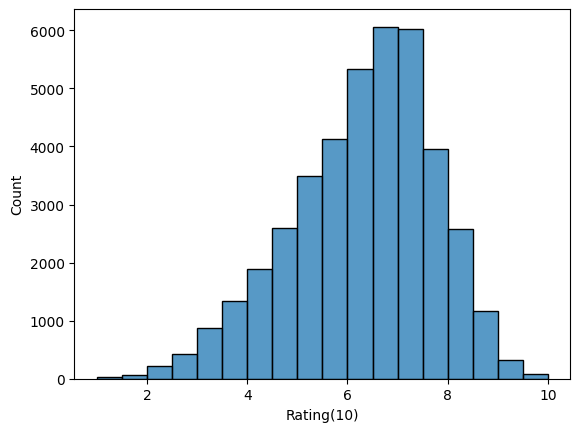

In [243]:
sns.histplot(data=df_exploded, x="Rating(10)", binwidth=0.5)

Seems like ratings follow a normal distribution and most common ratings are between 6.5-7, 7-7.5 and 6-6.5 in that order.

#### 2. Calculating the most common rating given by users:

In [238]:
counts = df_exploded["Rating(10)"].value_counts()

In [239]:
print("Most common rating: {0}, count = {1}".format(counts.index[0], counts.iloc[0]))

Most common rating: 7.2, count = 1342


#### 3. Analyze the genre distribution (if the dataset contains genres).

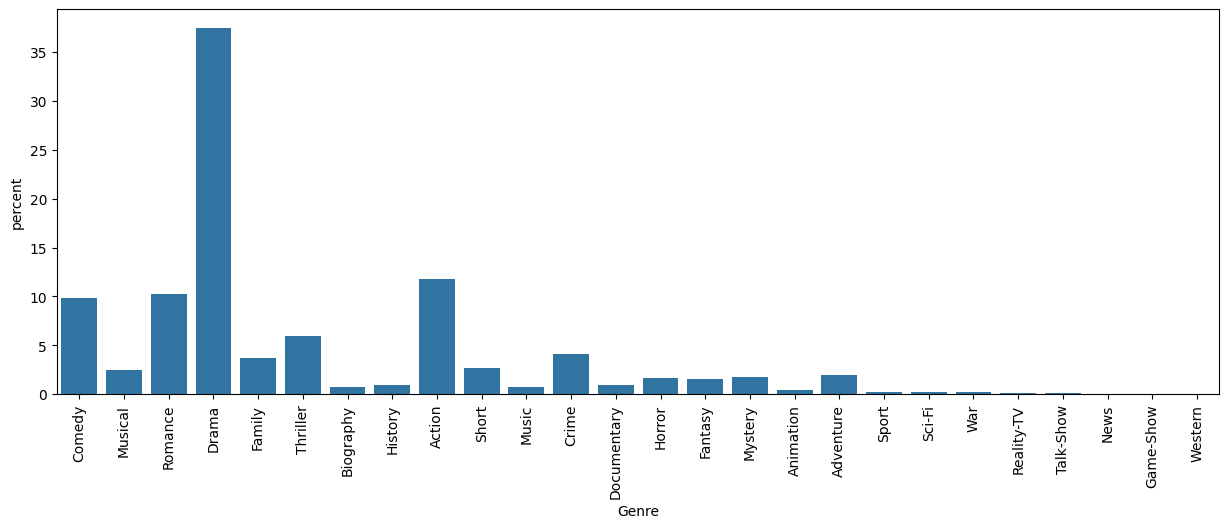

In [251]:
plt.figure(figsize=(15, 5))
sns.countplot(df_exploded, x="Genre", stat="percent")
plt.xticks(rotation=90)
plt.show()

The most common genre clearly seems to be "DRAMA" followed by "Action", "Comedy" and "Romance"

### Task 4: Bivariate and Multivariate Analysis

#### Explore the relationship between user demographics (age, gender) and ratings. 
For example:

Are certain age groups more likely to rate higher or lower?

Do male and female users rate movies differently?

In [245]:
# There's no such column in the dataset

#### Investigate how genre preferences vary by user demographics (age, gender).

In [246]:
# There's no such column in the dataset

#### Explore correlations between movie ratings and genres

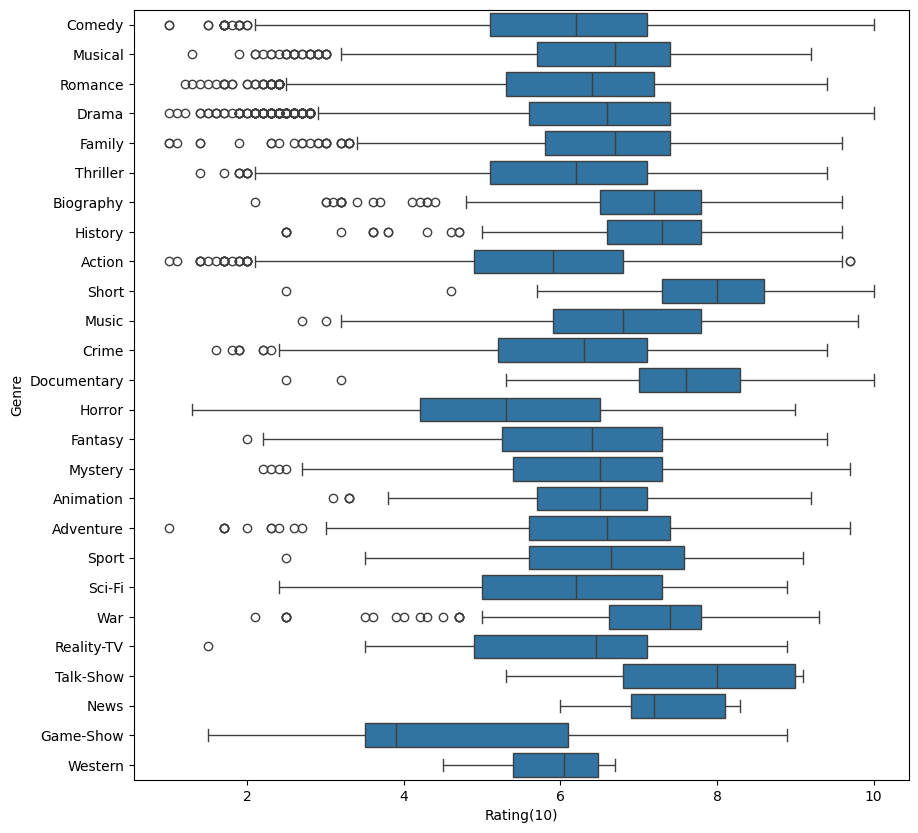

In [254]:
plt.figure(figsize=(10,10))
sns.boxplot(y=df_exploded.Genre, x=df_exploded["Rating(10)"])
plt.show()

### Task 5: Popular Movies and Trends

#### Identify the top 10 highest-rated movies

In [255]:
df_sorted = df_movie.sort_values(by="Rating(10)", ascending=False)

In [256]:
# df_sorted["Movie Name"] = df_sorted["Movie Name"].drop_duplicates()

In [257]:
df_sorted.head(10)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
23887,tt13223848,Marasim - Beyond Borders,2020.0,10.0,10.0,37.0,[Short],urdu
7812,tt11230970,Ilu-Ilu,2020.0,130.0,10.0,5.0,[Drama],marathi
34577,tt13559990,An Extraordinary Journey,2018.0,37.0,10.0,5.0,"[Documentary, Short]",nepali
23850,tt13951808,Bihari Binani,2021.0,NaN,10.0,6.0,"[Short, Comedy]",rajastani
31301,tt14496528,Harsukh,2021.0,43.0,10.0,9.0,"[Documentary, Short]",urdu
30151,tt13223848,Marasim - Beyond Borders,2020.0,10.0,10.0,37.0,[Short],oriya
39105,tt14496528,Harsukh,2021.0,43.0,10.0,9.0,"[Documentary, Short]",oriya
32076,tt7142142,Ashi Fasli Nanachi Tang,2011.0,109.0,10.0,5.0,[Comedy],marathi
42441,tt12504298,Antak,2019.0,6.0,10.0,7.0,[Short],nepali
11575,tt7598716,Maassab (The Teacher),2021.0,116.0,9.9,104.0,[Drama],hindi


In [258]:
# print("Top 10 movies are : ")
# print(f"{'Movie Name':<25} {'Rating(10)':<10} {'Votes':<6}")
# count=1
# for id in df_sorted["ID"].unique():
#     if(count>10):
#         break
#     # print(df_sorted[df_sorted["ID"]==id])
#     print(f"{df_sorted[df_sorted['ID']==id]['Movie Name'].unique()[0]:<25} {df_sorted[df_sorted['ID']==id]['Rating(10)'].unique()[0]:<10} {df_sorted[df_sorted['ID']==id]['Votes'].unique()[0]:<6}")
#     count+=1

In [259]:
df_top_10 = df_sorted.drop_duplicates(subset='Movie Name', keep='first').head(10)

In [260]:
print("Top 10 movies are:")
print(f"{'Movie Name':<25} {'Rating(10)':<10} {'Votes':<6}")

# Iterate over the top 10 movies and print their details
for _, row in df_top_10.iterrows():
    print(f"{row['Movie Name']:<25} {row['Rating(10)']:<10} {row['Votes']:<6}")

Top 10 movies are:
Movie Name                Rating(10) Votes 
Marasim - Beyond Borders  10.0       37.0  
Ilu-Ilu                   10.0       5.0   
An Extraordinary Journey  10.0       5.0   
Bihari Binani             10.0       6.0   
Harsukh                   10.0       9.0   
Ashi Fasli Nanachi Tang   10.0       5.0   
Antak                     10.0       7.0   
Maassab (The Teacher)     9.9        104.0 
The Survivor              9.9        7.0   
The Invisible Humans      9.9        8.0   


#### Find the top 10 most-watched movies (by the number of ratings)

In [261]:
df_sorted = df_movie.sort_values(by="Votes", ascending=False)

In [262]:
df_sorted.head(10)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
471,tt0371746,Iron Man,2008.0,126.0,7.9,954861.0,"[Action, Adventure, Sci-Fi]",urdu
13822,tt0371746,Iron Man,2008.0,126.0,7.9,954861.0,"[Action, Adventure, Sci-Fi]",oriya
26732,tt0082971,Indiana Jones and the Raiders of the Lost Ark,1981.0,115.0,8.4,894336.0,"[Action, Adventure]",nepali
11493,tt0120915,Star Wars: Episode I - The Phantom Menace,1999.0,136.0,6.5,740452.0,"[Action, Adventure, Fantasy]",sanskrit
35212,tt1187043,3 Idiots,2009.0,170.0,8.4,351187.0,"[Comedy, Drama]",hindi
26330,tt1790885,Zero Dark Thirty,2012.0,157.0,7.4,275912.0,"[Drama, History, Thriller]",oriya
37398,tt1790885,Zero Dark Thirty,2012.0,157.0,7.4,275912.0,"[Drama, History, Thriller]",urdu
17587,tt3040964,The Jungle Book,2016.0,106.0,7.4,261319.0,"[Adventure, Drama, Family]",urdu
2122,tt3040964,The Jungle Book,2016.0,106.0,7.4,261319.0,"[Adventure, Drama, Family]",oriya
48165,tt3040964,The Jungle Book,2016.0,106.0,7.4,261319.0,"[Adventure, Drama, Family]",tamil


In [263]:
df_top_10 = df_sorted.drop_duplicates(subset='Movie Name', keep='first').head(10)

In [265]:
print("Top 10 movies are:")
print(f"{'Movie Name':<50} {'Votes':<10}")

# Iterate over the top 10 movies and print their details
for _, row in df_top_10.iterrows():
    print(f"{row['Movie Name']:<50} {row['Votes']:<10}")

Top 10 movies are:
Movie Name                                         Votes     
Iron Man                                           954861.0  
Indiana Jones and the Raiders of the Lost Ark      894336.0  
Star Wars: Episode I - The Phantom Menace          740452.0  
3 Idiots                                           351187.0  
Zero Dark Thirty                                   275912.0  
The Jungle Book                                    261319.0  
Eastern Promises                                   230284.0  
Escape Plan                                        229488.0  
Get Smart                                          205758.0  
A Good Day to Die Hard                             199575.0  


#### Explore if certain movie genres have higher average ratings

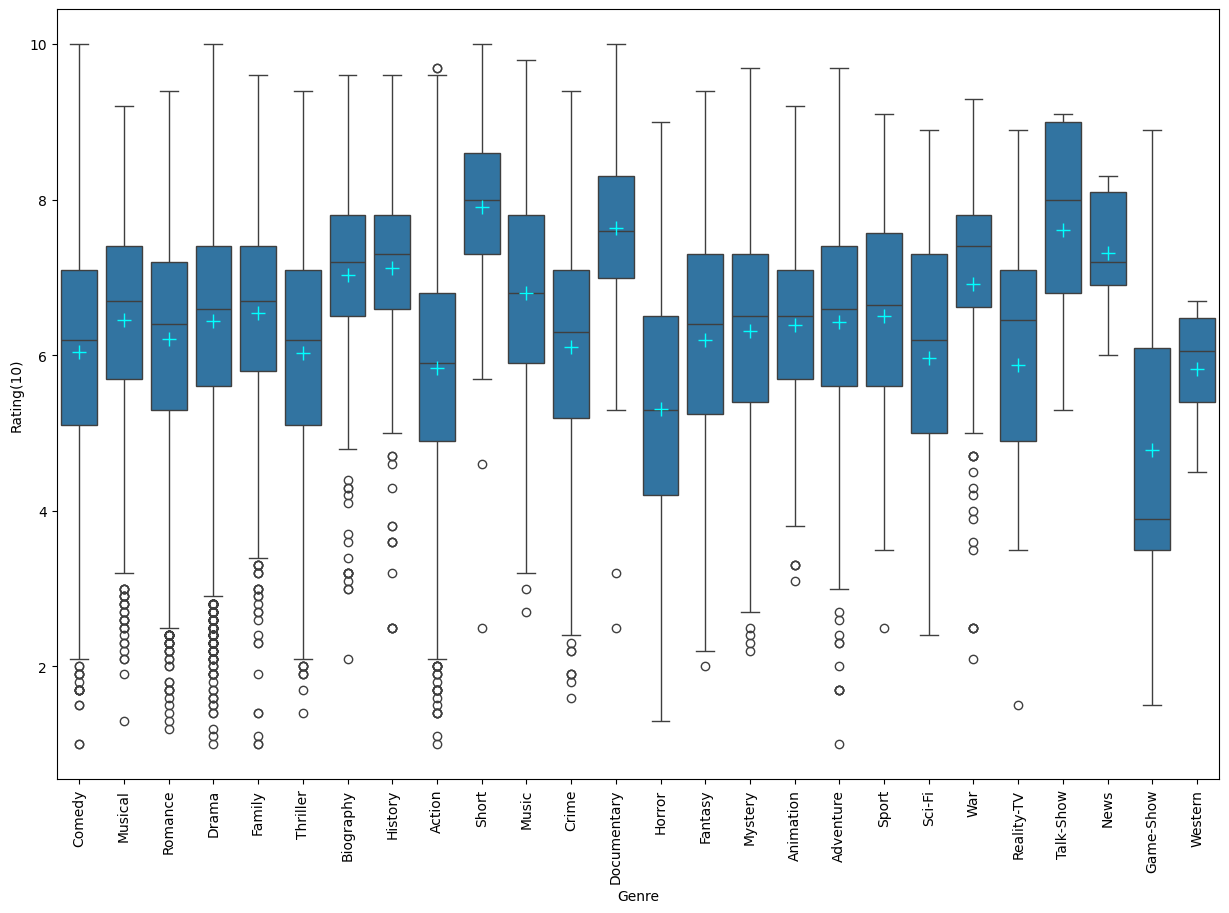

In [266]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df_exploded.Genre, y=df_exploded["Rating(10)"], showmeans=True, meanprops={"marker": "+",
                       "markeredgecolor": "cyan",
                       "markersize": "10"})
plt.xticks(rotation=90)
plt.show()

In [267]:
df_grouped_genres = df_exploded[["Rating(10)", "Genre"]].groupby(by="Genre").mean()

In [268]:
df_grouped_genres = df_grouped_genres.sort_values(by="Rating(10)", ascending=False)

In [269]:
df_grouped_genres

,Rating(10)
Genre,
Short,7.912538
Documentary,7.638679
Talk-Show,7.609091
News,7.311765
History,7.127200
Biography,7.034304
War,6.910769
Music,6.805023
Family,6.538617


This also confirms the same thing as the visualization. The top 3 Genres are "Short", "Documentary" and "Talk-Show" in descending order.

### Task 6: Time-Based Analysis

#### Perform an analysis to see how ratings have changed over time (using the timestamp)

In [270]:
# no such column

#### Investigate if there are particular years or seasons where movies receive higher ratings

In [271]:
df_movie.sample(10)

,ID,Movie Name,Year,Timing(min),Rating(10),Votes,Genre,Language
19012,tt13045454,Paranjothi,2015.0,NaN,NaN,NaN,[Drama],tamil
8398,tt0064506,Ittefaq,1969.0,104.0,7.4,963.0,"[Crime, Mystery, Thriller]",hindi
8800,tt0107060,Gumrah,1993.0,149.0,6.2,691.0,"[Action, Crime, Drama]",hindi
28989,tt0091512,Mera Dharam,1986.0,NaN,4.1,8.0,"[Action, Thriller]",hindi
21140,tt0854121,Chikkadu Dorakadu,1967.0,163.0,7.0,20.0,"[Action, Adventure, Drama]",telugu
27157,tt0158144,Ranur Pratham Bhag,1974.0,NaN,7.2,8.0,[Drama],bengali
23071,tt11596782,Mann Fakiraa,2020.0,133.0,7.8,23.0,"[Comedy, Drama, Romance]",marathi
49115,tt2187114,Samar,2013.0,157.0,5.4,756.0,"[Action, Adventure, Thriller]",tamil
293,tt4604852,Diyar Bhojai,1980.0,NaN,NaN,NaN,[Romance],gujarati
9122,tt2202481,Mera Punjab,1994.0,158.0,5.8,5.0,[Action],punjabi


<Axes: xlabel='Year', ylabel='Rating(10)'>

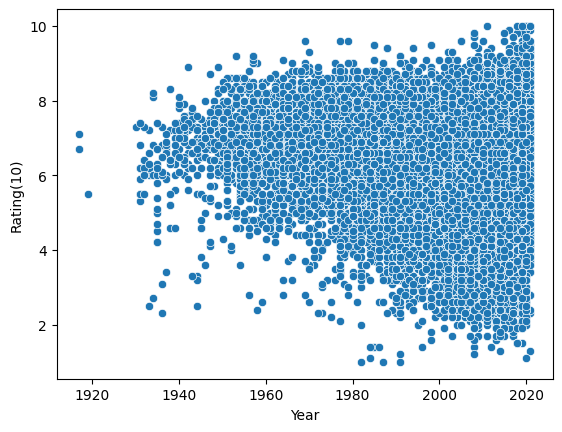

In [272]:
sns.scatterplot(x=df_movie["Year"], y=df_movie["Rating(10)"])

Seems like with increasing years the movies have been getting more and more lower ratings.

#### Task 7: Visualizations

* Provide relevant visualizations (histograms, bar plots, heatmaps, etc.) to supportyour findings.


* Visualize trends such as the distribution of ratings across different genres or userdemographics

In [273]:
# Already done above

#### Task 8: Conclusion

##### Key Findings:
* The Movie ratings dataset seemed to a lot of invalid and missing data initially.

* The most watched movie is "Iron man" with around 954861.0 votes.

* The highly rated movies are following 7 with a rating of 10/10 :
    1. Marasim - Beyond Borders
    2. Ilu-Ilu
    3. An Extraordinary Journey
    4. Bihari Binani 
    5. Harsukh 
    6. Ashi Fasli Nanachi Tang
    7. Antak 

* The top 3 Genres are "Short", "Documentary" and "Talk-Show" in descending order.

##### Future:
* The unique ID seems to be IMDB id and we can get the missing values from imdb api in future in we wanted to.